In [163]:
import numpy as np 
import math
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import copy 
from mpl_toolkits.mplot3d import Axes3D


In [43]:
def sigmoid_function(x):
    return 1/(1+np.exp(-x))

In [20]:
x = np.arange(-10,11)
y = sigmoid_function(x)
print(np.c_[x,y])


[[-1.00000000e+01  4.53978687e-05]
 [-9.00000000e+00  1.23394576e-04]
 [-8.00000000e+00  3.35350130e-04]
 [-7.00000000e+00  9.11051194e-04]
 [-6.00000000e+00  2.47262316e-03]
 [-5.00000000e+00  6.69285092e-03]
 [-4.00000000e+00  1.79862100e-02]
 [-3.00000000e+00  4.74258732e-02]
 [-2.00000000e+00  1.19202922e-01]
 [-1.00000000e+00  2.68941421e-01]
 [ 0.00000000e+00  5.00000000e-01]
 [ 1.00000000e+00  7.31058579e-01]
 [ 2.00000000e+00  8.80797078e-01]
 [ 3.00000000e+00  9.52574127e-01]
 [ 4.00000000e+00  9.82013790e-01]
 [ 5.00000000e+00  9.93307149e-01]
 [ 6.00000000e+00  9.97527377e-01]
 [ 7.00000000e+00  9.99088949e-01]
 [ 8.00000000e+00  9.99664650e-01]
 [ 9.00000000e+00  9.99876605e-01]
 [ 1.00000000e+01  9.99954602e-01]]


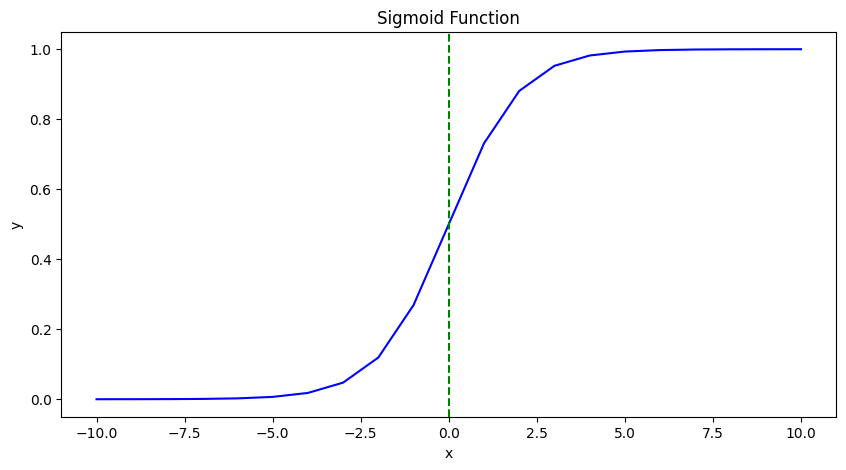

In [21]:
fig,ax = plt.subplots(1,1, figsize=(10,5))
ax.plot(x,y,c="b")
ax.set_title("Sigmoid Function")
ax.set_xlabel("x")
ax.set_ylabel("y")
plt.axvline(x=0, color='g', linestyle='--', label=f'Vertical Threshold = {0}') # add vertical threshold line
plt.show()

In [22]:
# Logistic Regression example data set
# Given data
x_train_org = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])  # Original 1D array
x_train = x_train_org.reshape(-1, 1)  # Reshape to 2D array for sklearn
y_train_org = np.array([0, 0, 0, 0, 0, 0, 1, 1, 1, 1])
w_in = np.zeros((1))
b_in = 0

In [23]:
X_train, X_test, y_train, y_test = train_test_split(x_train, y_train_org, test_size=0.2, random_state=42)


In [160]:
# pos = y_train_org == 1
# neg = y_train_org == 0 

# fig, ax1 = plt.subplots(1, 1, figsize=(10, 5))

# # Plot the original data points
# ax1.scatter(x_train_org[pos], y_train_org[pos], c="b", label="Positive")
# ax1.scatter(x_train_org[neg], y_train_org[neg], c="r", label="Negative")
# ax1.set_xlabel("x")
# ax1.set_ylabel("y")
# ax1.set_title("Logistic Regression Data Set")

# # Create a secondary y-axis
# ax2 = ax1.twinx()
# ax2.plot(x_train_org, y_pred, c="g", label="Linear Regression")
# ax2.set_ylabel("Probability")

# # Combine legends
# lines_1, labels_1 = ax1.get_legend_handles_labels()
# lines_2, labels_2 = ax2.get_legend_handles_labels()
# ax1.legend(lines_1 + lines_2, labels_1 + labels_2)

# plt.show()


In [25]:
x_train = np.array([0., 1, 2, 3, 4, 5],dtype=np.longdouble)
y_train = np.array([0,  0, 0, 1, 1, 1],dtype=np.longdouble)

In [26]:
def compute_cost_mse_sig(x,y,w,b):
    m = x.shape[0]
    cost = 0
    for i in range(m):
        A = sigmoid_function(np.dot(x[i],w) + b)
        cost += (A - y[i])**2
    cost = cost/m
    return cost

In [27]:
w_range = np.linspace(-5,12.5)
b_range = np.linspace(-20,10)
W0,B = np.meshgrid(w_range,b_range)
Z = np.zeros(W0.shape)
for i in range(W0.shape[0]):
    for j in range(W0.shape[1]):
        Z[i,j] = compute_cost_mse_sig(x_train,y_train,W0[i,j],B[i,j])

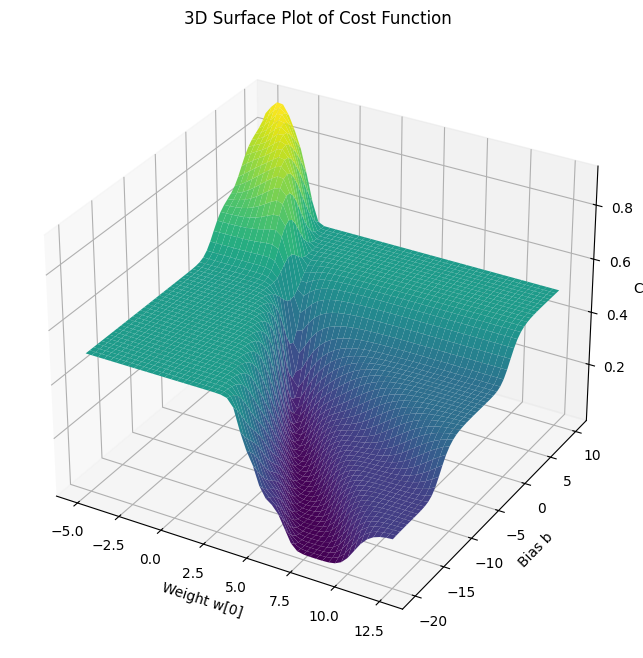

In [28]:
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(W0, B, Z, cmap='viridis')
ax.set_xlabel('Weight w[0]')
ax.set_ylabel('Bias b')
ax.set_zlabel('Cost')
ax.set_title('3D Surface Plot of Cost Function')
plt.show()


In [29]:
def compute_cost_mse_sig(x,y,w,b):
    m = x.shape[0]
    cost = 0
    for i in range(m):
        A = sigmoid_function(np.dot(x[i],w) + b)
        cost += -y[i]*np.log(A) - (1-y[i])*np.log(1-A)
    cost = cost/m
    return cost

In [30]:
w_range = np.linspace(-5,12.5)
b_range = np.linspace(-20,10)
W0,B = np.meshgrid(w_range,b_range)
Z = np.zeros(W0.shape)
for i in range(W0.shape[0]):
    for j in range(W0.shape[1]):
        Z[i,j] = compute_cost_mse_sig(x_train,y_train,W0[i,j],B[i,j])

/var/folders/36/vl9bxtq50zvb_w53_lj4rqgh0000gp/T/ipykernel_6911/303293585.py:6: RuntimeWarning: divide by zero encountered in log
  cost += -y[i]*np.log(A) - (1-y[i])*np.log(1-A)
/var/folders/36/vl9bxtq50zvb_w53_lj4rqgh0000gp/T/ipykernel_6911/303293585.py:6: RuntimeWarning: invalid value encountered in scalar multiply
  cost += -y[i]*np.log(A) - (1-y[i])*np.log(1-A)


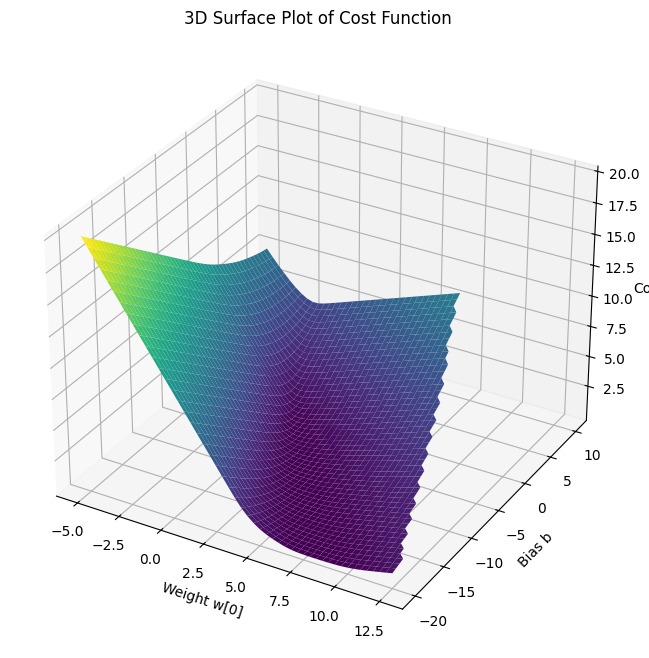

In [31]:
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(W0, B, Z, cmap='viridis')
ax.set_xlabel('Weight w[0]')
ax.set_ylabel('Bias b')
ax.set_zlabel('Cost')
ax.set_title('3D Surface Plot of Cost Function')
plt.show()


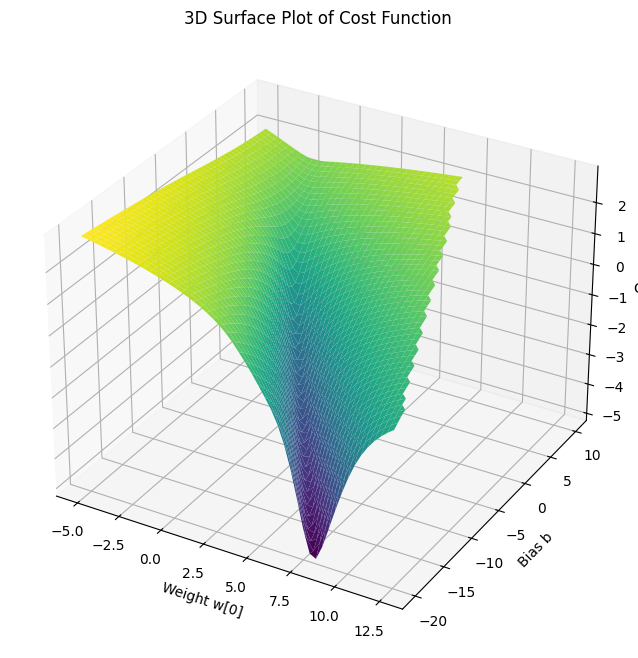

In [32]:
Z = np.log(Z)
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(W0, B, Z, cmap='viridis')
ax.set_xlabel('Weight w[0]')
ax.set_ylabel('Bias b')
ax.set_zlabel('Cost')
ax.set_title('3D Surface Plot of Cost Function')
plt.show()


In [141]:
def compute_logistic_gradient(X, y, w, b):
    m, n = X.shape
    dj_dw = np.zeros((n,))
    dj_db = 0
    for i in range(m):
        error  = sigmoid_function(np.dot(X[i], w) + b) -y[i]
        for j in range(n):
            dj_dw[j] +=  error * X[i, j]
        dj_db += error
    dj_dw /=m
    dj_db /=m
    return dj_dw, dj_db

In [142]:
def gradient_descent_logistic(X, y, w_in, b_in, alpha, epochs):
    J_history = []
    w = copy.deepcopy(w_in)
    b = b_in
    
    for i in range(epochs):
        dj_dw, dj_db = compute_logistic_gradient(X, y, w, b)
        w = w - alpha * dj_dw
        b = b - alpha * dj_db
        
        if i < 100000:  # prevent resource exhaustion 
            J_history.append(compute_cost_mse_sig(X, y, w, b))

        if i % math.ceil(epochs / 10) == 0:
            print(f"Iteration {i:4d}: Cost {J_history[-1]}")

    return w, b, J_history 

In [143]:
X_train = np.array([[0.5, 1.5], [1,1], [1.5, 0.5], [3, 0.5], [2, 2], [1, 2.5]])
y_train = np.array([0, 0, 0, 1, 1, 1])

In [144]:
w_tmp  = np.zeros_like(X_train[0])
b_tmp  = 0.
alph = 0.1
iters = 10000

w_out, b_out, _ = gradient_descent_logistic(X_train, y_train, w_tmp, b_tmp, alph, iters) 
print(f"\nupdated parameters: w:{w_out}, b:{b_out}")

Iteration    0: Cost 0.684610468560574
Iteration 1000: Cost 0.1590977666870457
Iteration 2000: Cost 0.08460064176930078
Iteration 3000: Cost 0.05705327279402531
Iteration 4000: Cost 0.04290759421682
Iteration 5000: Cost 0.03433847729884557
Iteration 6000: Cost 0.02860379802212006
Iteration 7000: Cost 0.02450156960879306
Iteration 8000: Cost 0.02142370332569295
Iteration 9000: Cost 0.019030137124109114

updated parameters: w:[5.28123029 5.07815608], b:-14.222409982019837


In [145]:
def plot_decision_boundary(X, y, w, b):
    # Create a grid of points
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))
    
    # Calculate probabilities for each point in the grid
    Z = sigmoid_function(np.dot(np.c_[xx.ravel(), yy.ravel()], w) + b)
    Z = Z.reshape(xx.shape)
    
    # Plot contour map
    plt.contourf(xx, yy, Z, alpha=0.8, levels=np.linspace(0, 1, 10), cmap='Blues')
    plt.colorbar()
    
    # Plot decision boundary
    plt.contour(xx, yy, Z, levels=[0.5], linewidths=1, colors='blue')
    
    # Plot data points
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', cmap=plt.cm.Paired, marker='o', s=100)
    plt.xlabel('X0')
    plt.ylabel('X1')
    
    # Customizing the plot
    colors = ['red' if label == 1 else 'blue' for label in y]
    markers = ['x' if label == 1 else 'o' for label in y]
    for i, marker in enumerate(markers):
        plt.scatter(X[i, 0], X[i, 1], color=colors[i], marker=marker, s=100)
    
    plt.legend(['y=1', 'y=0'], loc='best')
    plt.title('Decision Boundary and Probability Contour')
    plt.show()

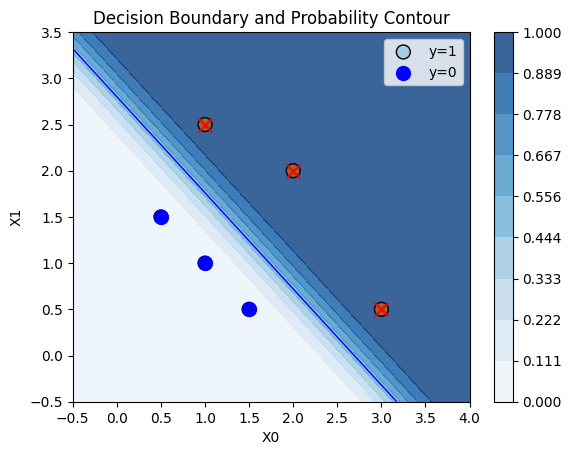

In [146]:
plot_decision_boundary(X_train, y_train, w_out, b_out)


In [150]:
w_range  = np.linspace(-1,7)
b_range  = np.linspace(0,-15)
W0,B = np.meshgrid(w_range,b_range)
Z = np.zeros(W0.shape)
for i in range(W0.shape[0]):
    for j in range(W0.shape[1]):
        Z[i, j] = compute_cost_mse_sig(X_train, y_train, np.array([W0[i, j], W0[i, j]]), B[i, j])


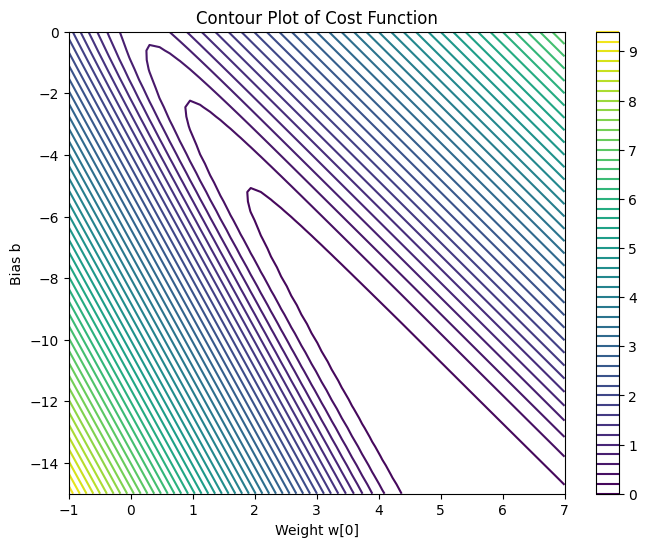

In [153]:
plt.figure(figsize=(8, 6))
cp = plt.contour(W0, B, Z, levels=50, cmap='viridis')
plt.colorbar(cp)
plt.xlabel('Weight w[0]')
plt.ylabel('Bias b')
plt.title('Contour Plot of Cost Function')
plt.show()

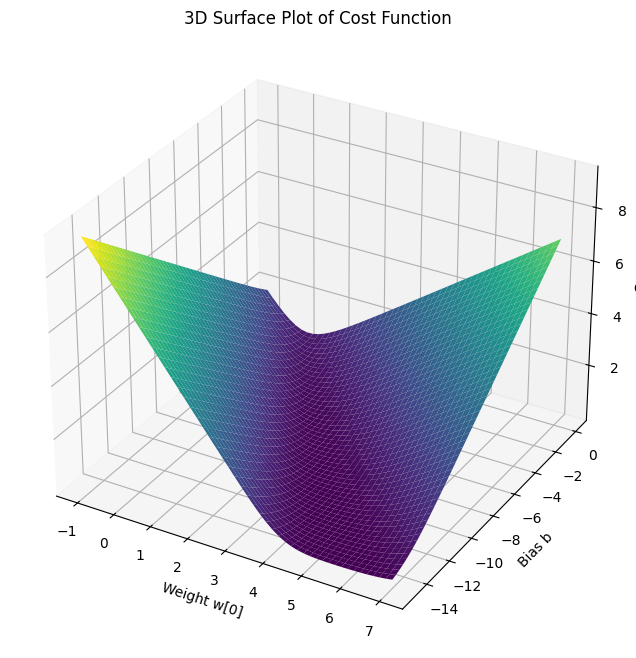

In [166]:
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(W0, B, Z, cmap='viridis')
ax.set_xlabel('Weight w[0]')
ax.set_ylabel('Bias b')
ax.set_zlabel('Cost')
ax.set_title('3D Surface Plot of Cost Function')
plt.show()


In [170]:
import plotly.graph_objects as go
# Create an interactive 3D plot using Plotly
fig = go.Figure(data=[go.Surface(z=Z, x=W0, y=B, colorscale='Viridis')])

# Update plot layout
fig.update_layout(
    title='3D Surface Plot of Cost Function',
    scene=dict(
        xaxis_title='Weight w[0]',
        yaxis_title='Bias b',
        zaxis_title='Cost'
    ),
    autosize=False,
    width=600,
    height=600,
    margin=dict(l=65, r=50, b=65, t=90)
)

# Show plot
fig.show()


In [171]:
# Find the index of the minimum cost
min_cost_index = np.unravel_index(np.argmin(Z), Z.shape)
min_cost_w0 = W0[min_cost_index]
min_cost_b = B[min_cost_index]
min_cost_value = Z[min_cost_index]

# Create an interactive 3D plot using Plotly
fig = go.Figure(data=[go.Surface(z=Z, x=W0, y=B, colorscale='Viridis', opacity=0.7)])

# Add a scatter plot for the minimum cost point
fig.add_trace(go.Scatter3d(
    x=[min_cost_w0],
    y=[min_cost_b],
    z=[min_cost_value],
    mode='markers',
    marker=dict(size=10, color='red', symbol='circle'),
    name='Min Cost Point'
))

# Update plot layout
fig.update_layout(
    title='3D Surface Plot of Cost Function with Minimum Cost Point',
    scene=dict(
        xaxis_title='Weight w[0]',
        yaxis_title='Bias b',
        zaxis_title='Cost'
    ),
    autosize=False,
    width=800,
    height=800,
    margin=dict(l=65, r=50, b=65, t=90)
)

# Show plot
fig.show()